# Bayesian Machine Learning

### Preliminaries

- Goals
  - Introduction to Bayesian (i.e., probabilistic) modeling
- Materials
  - Mandatory
    - These lecture notes
  - Optional
    - Bishop pp. 68-74 (on the coin toss example)
    - [Ariel Caticha - 2012 - Entropic Inference and the Foundations of Physics](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Caticha-2012-Entropic-Inference-and-the-Foundations-of-Physics.pdf), pp.35-44 (section 2.9, on deriving Bayes rule for updating probabilities)
    - [David Blei - 2014 - Build, Compute, Critique, Repeat: Data Analysis with Latent Variable Models](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Blei-2014-Build-Compute-Critique-Repeat.pdf), on the _Build-Compute-Critique-Repeat_ design model.

### Challenge: Predicting a Coin Toss

- **Problem**: We observe a the following sequence of heads (h) and tails (t) when tossing the same coin repeatedly $$D=\{hthhtth\}\,.$$

- What is the probability that heads comes up next?

- **Solution**: later in this lecture. 

### The Bayesian Machine Learning Framework

- Suppose that your application is to predict a future observation $x$, based on $N$ past observations $D=\{x_1,\dotsc,x_N\}$.

- The Bayesian design approach to solving this task involves four stages: 

<span style=color:red>REPEAT</span>
  > 1- Model specification         
  > 2- Parameter estimation (i.e., learning from an observed data set using Bayesian inference)        
  > 3- Model evaluation (how good is this (trained) model?)          
  
<span style=color:red>UNTIL model performance is satisfactory</span>
  > 4- Apply model, e.g. for prediction or classification of new data

- In principle, based on the model evaluation results, you may want to re-specify your model and _repeat_ the design process (a few times), until model performance is acceptable. 

  
- Next, we discuss these four stages in a bit more detail.

### (1) Model specification

- Your first task is to propose a probabilistic model ($m$) for generating the observations $x$.

- A probabilistic model $m$ consists of a joint distribution $p(x,\theta|m)$ that relates observations $x$ to model parameters $\theta$. Usually, the model is proposed in the form of a data generating  distribution $p(x|\theta,m)$ and a prior $p(\theta|m)$. 

- _You_ are responsible to choose the data generating distribution $p(x|\theta)$ based on your physical understanding of the data generating process. (For simplicity, we dropped the given dependency on $m$ from the notation).
 

- _You_ must also choose the prior $p(\theta)$ to reflect what you know about the parameter values before you see the data $D$.
  

### (2) Parameter estimation

- Note that, for a given data set $D=\{x_1,x_2,\dots,x_N\}$ with _independent_ observations $x_n$, the likelihood is 
$$ p(D|\theta) = \prod_{n=1}^N p(x_n|\theta)\,,$$
so usually you select a model for generating one observation $x_n$ and then use (in-)dependence assumptions to combine these models into a likelihood function for the model parameters.

- The likelihood and prior both contain information about the model parameters. Next, you use Bayes rule to fuse these two information sources into a posterior distribution for the parameters,
$$
p(\theta|D) = \frac{p(D|\theta) p(\theta)}{p(D)} \propto p(D|\theta) p(\theta)
$$  

- Note that there's **no need for you to design some clever parameter estimation algorithm**. Bayes rule _is_ the parameter estimation algorithm. The only complexity lies in the computational issues! 

- This "recipe" works only if the right-hand side (RHS) factors can be evaluated; the computational details can be quite challenging and this is what machine learning is about.     
  
- $\Rightarrow$ **Machine learning is EASY, apart from computational details :)**
  

###  (3) Model Evaluation 

- In the framework above, parameter estimation was executed by "perfect" Bayesian reasoning. So is everything settled now? 

- No, there appears to be one remaining problem: how good really were our model assumptions $p(x|\theta)$ and $p(\theta)$? We want to "score" the model performance.

- Note that this question is only interesting if we have alternative models to choose from. 

- Let's assume that we have more candidate models, say $\mathcal{M} = \{m_1,\ldots,m_K\}$ where each model relates to specific prior $p(\theta|m_k)$ and likelihood $p(D|\theta,m_k)$? Can we evaluate the relative performance of a model against another model from the set?

- Start again with **model specification**. _You_ must now specify a prior $p(m_k)$ (next to the likelihood $p(D|\theta,m_k)$ and prior $p(\theta|m_k)$) for each of the models and then solve the desired inference problem:      
$$\begin{align*} 
\underbrace{p(m_k|D)}_{\substack{\text{model}\\\text{posterior}}} &= \frac{p(D|m_k) p(m_k)}{p(D)} \\
  &\propto p(m_k) \cdot p(D|m_k) \\
  &= p(m_k)\cdot \int_\theta p(D,\theta|m_k) \,\mathrm{d}\theta\\
  &= \underbrace{p(m_k)}_{\substack{\text{model}\\\text{prior}}}\cdot \underbrace{\int_\theta \underbrace{p(D|\theta,m_k)}_{\text{likelihood}} \,\underbrace{p(\theta|m_k)}_{\text{prior}}\, \mathrm{d}\theta }_{\substack{\text{evidence }p(D|m_k)\\\text{= model likelihood}}}\\
\end{align*}$$
- This procedure is called **Bayesian model comparison**, which requires that you calculate the "evidence" (= model likelihood). 

- $\Rightarrow$ In a Bayesian framework, **model estimation** follows the same recipe as parameter estimation; it just works at one higher hierarchical level. Compare the required calulations:

$$\begin{align*}
p(\theta|D) &\propto p(D|\theta) p(\theta) \; &&\text{(parameter estimation)} \\
p(m_k|D) &\propto p(D|m_k) p(m_k) \; &&\text{(model comparison)}
\end{align*}$$

- In principle, you could proceed with asking how good your choice for the candidate model set $\mathcal{M}$ was. You would have to provide a set of alternative model sets $\{\mathcal{M}_1,\mathcal{M}_2,\ldots,\mathcal{M}_M\}$ with priors $p(\mathcal{M}_m)$ for each set and compute posteriors $p(\mathcal{M}_m|D)$. And so forth ...  

- With the (relative) performance evaluation scores of your model in hand, you could now re-specify your model (hopefully an improved model) and _repeat_ the design process until the model performance score is acceptable. 

### (4) Prediction

- Once we are satisfied with the evidence for a (trained) model, we can apply the model to our prediction/classification/etc task.

- Given the data $D$, our knowledge about the yet unobserved datum $x$ is captured by (everything is conditioned on the selected model)
$$\begin{align*}
p(x|D) &\stackrel{s}{=} \int p(x,\theta|D) \,\mathrm{d}\theta\\
 &\stackrel{p}{=} \int p(x|\theta,D) p(\theta|D) \,\mathrm{d}\theta\\
 &\stackrel{m}{=} \int \underbrace{p(x|\theta)}_{\text{data generation dist.}} \cdot \underbrace{p(\theta|D)}_{\text{posterior}} \,\mathrm{d}\theta\\
\end{align*}$$

- Again, **no need to invent a special prediction algorithm**. Probability theory takes care of all that. The complexity of prediction is just computational: how to carry out the marginalization over $\theta$.

- Note that the application of the learned posterior $p(\theta|D)$ not necessarily has to be a prediction task. We use it here as an example, but other applications (e.g., classification, regression etc.) are of course also possible. 
  

- What did we learn from $D$? Without access to $D$, we would predict new observations through
$$
p(x) = \int p(x,\theta) \,\mathrm{d}\theta = \int p(x|\theta) \cdot \underbrace{p(\theta)}_{\text{prior}} \,\mathrm{d}\theta
$$

##### Prediction with multiple models

- When you have a posterior $p(m_k|D)$ for the models, you don't need to choose one model for the prediction task. You can do prediction by **Bayesian model averaging** to utilitize the predictive power from all models:
$$\begin{align*}
p(x|D) &= \sum_k \int p(x,\theta,m_k|D)\,\mathrm{d}\theta \\
 &= \sum_k \int  p(x|\theta,m_k) \,p(\theta|m_k,D)\, p(m_k|D) \,\mathrm{d}\theta \\
  &= \sum_k \underbrace{p(m_k|D)}_{\substack{\text{model}\\\text{posterior}}} \cdot \int \underbrace{p(\theta|m_k,D)}_{\substack{\text{parameter}\\\text{posterior}}} \, \underbrace{p(x|\theta,m_k)}_{\substack{\text{data generating}\\\text{distribution}}} \,\mathrm{d}\theta
\end{align*}$$ 

- Alternatively, if you need to work with one model (e.g. due to computational resource constraints), you can for instance select the model with largest posterior $p(m_k|D)$ and use that model for prediction. This is called **Bayesian model selection**.

### Bayesian Machine Learning and the Scientific Method Revisited

- The Bayesian design process provides a unified framework for the Scientific Inquiry method. We can now add equations to the design loop. (Trial design to be discussed in [Intelligent Agent lesson](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/12-Intelligent-Agents-and-Active-Inference.ipynb).) 

<img src="./figures/scientific-inquiry-loop-w-BML-eqs.png" width="600px">


### Now Solve the Example Problem: Predicting a Coin Toss

- We observe a the following sequence of heads ($h$) and tails ($t$) when tossing the same coin repeatedly $$D=\{hthhtth\}\,.$$

- What is the probability that heads comes up next? We solve this in the next slides ...

### Coin toss example (1): Model Specification

- We observe a sequence of $N$ coin tosses $D=\{x_1,\ldots,x_N\}$ with $n$ heads. 

- Let us denote outcomes by 
$$x_k = \begin{cases} h & \text{if heads comes up} \\
  t & \text{if tails} \end{cases}
  $$

##### Likelihood

- Assume a [**Bernoulli** distributed](https://en.wikipedia.org/wiki/Bernoulli_distribution) variable $p(x_k=h|\mu)=\mu$, which leads to a [**binomial** distribution](https://en.wikipedia.org/wiki/Binomial_distribution) for the likelihood (assume $n$ times heads were thrown):
$$   
p(D|\mu) = \prod_{k=1}^N p(x_k|\mu) = \mu^n (1-\mu)^{N-n}
$$

##### <a id="beta-prior">Prior</a>

-  Assume the prior belief is governed by a [**beta distribution**](https://en.wikipedia.org/wiki/Beta_distribution)

$$
p(\mu) = \mathcal{B}(\mu|\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \mu^{\alpha-1}(1-\mu)^{\beta-1}
$$
<!---  - The Gamma function is sort of a generalized factorial function. If $\alpha,\beta$ are integers, then $\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)(\Gamma(\beta)} = \frac{(\alpha+\beta-1)!}{(\alpha-1)!\,(\beta-1)!}$
---> 

- A _what_ distribution? Yes, the **beta distribution** is a **conjugate prior** for the binomial distribution, which means that 
$$
\underbrace{\text{beta}}_{\text{posterior}} \propto \underbrace{\text{binomial}}_{\text{likelihood}} \times \underbrace{\text{beta}}_{\text{prior}}
$$
so we get a closed-form posterior.

- $\alpha$ and $\beta$ are called **hyperparameters**, since they parameterize the distribution for another parameter ($\mu$). E.g., $\alpha=\beta=1$ (uniform).
  

<img src="./figures/B-fig-2.2.png" width="600px">
- (Bishop Fig.2.2). Plots of the beta distribution $\mathcal{B}(μ|a, b)$ as a function of $μ$ for various values of the hyperparameters $a$ and $b$.

### Coin toss example (2): Parameter estimation

- Infer posterior PDF over $\mu$ through Bayes rule

$$\begin{align*}
p(\mu|D) &\propto p(D|\mu)\,p(\mu|\alpha,\beta)  \\ 
        &= \mu^n (1-\mu)^{N-n} \times \mu^{\alpha-1} (1-\mu)^{\beta-1} \\
        &= \mu^{n+\alpha-1} (1-\mu)^{N-n+\beta-1} 
\end{align*}$$

hence the posterior is also beta-distributed as

$$
p(\mu|D) = \mathcal{B}(\mu|\,n+\alpha, N-n+\beta)
$$



### Coin Toss Example (3): Prediction

- For simplicity, we skip the model evaluation task here and proceed to **apply** the trained model. Let's use it to predict future observations. 

- Marginalize over the parameter posterior to get the predictive PDF for a new coin toss $x_\bullet$, given the data $D$,

$$\begin{align*}
p(x_\bullet=h|D)  &= \int_0^1 p(x_\bullet=h|\mu)\,p(\mu|D) \,\mathrm{d}\mu \\
  &= \int_0^1 \mu \times  \mathcal{B}(\mu|\,n+\alpha, N-n+\beta) \,\mathrm{d}\mu  \\
  &= \frac{n+\alpha}{N+\alpha+\beta}
\end{align*}$$

- This result is known as [**Laplace's rule of succession**](https://en.wikipedia.org/wiki/Rule_of_succession)

- Finally, we're ready to solve our example problem: for $D=\{hthhtth\}$ and uniform prior ($\alpha=\beta=1$), we get

$$ p(x_\bullet=h|D)=\frac{n+1}{N+2} = \frac{4+1}{7+2} = \frac{5}{9}$$
 

### Coin Toss Example: What did we learn?

- What did we learn from the data? Before seeing any data, we think that $$p(x_\bullet=h)=\left. p(x_\bullet=h|D) \right|_{n=N=0} = \frac{\alpha}{\alpha + \beta}\,.$$ 

- Hence, $\alpha$ and $\beta$ are prior pseudo-counts for heads and tails respectively. 

- After the $N$ coin tosses, we think that $p(x_\bullet=h|D) = \frac{n+\alpha}{N+\alpha+\beta}$.

- Note the following decomposition

$$\begin{align*}
    p(x_\bullet=h|\,D) &= \frac{n+\alpha}{N+\alpha+\beta} = \frac{n}{N+\alpha+\beta} + \frac{\alpha}{N+\alpha+\beta} \\
        &= \frac{N}{N+\alpha+\beta}\cdot \frac{n}{N} + \frac{\alpha+\beta}{N+\alpha+\beta} \cdot \frac{\alpha}{\alpha+\beta} \\
        &= \underbrace{\frac{\alpha}{\alpha+\beta}}_{\substack{\text{prior}\\\text{prediction}}} + \underbrace{\underbrace{\frac{N}{N+\alpha+\beta}}_{\text{gain}}\cdot \underbrace{\big( \underbrace{\frac{n}{N}}_{\substack{\text{data-based}\\\text{prediction}}} - \underbrace{\frac{\alpha}{\alpha+\beta}}_{\substack{\text{prior}\\\text{prediction}}} \big)}_{\text{prediction error}}}_{\text{correction}}
\end{align*}$$

- Note that, since $0\leq \underbrace{\frac{N}{N+\alpha+\beta}}_{\text{gain}} \lt 1$, the Bayesian prediction lies between (fuses) the prior and data-based predictions. The data plays the role of "correcting" the prior prediction.

- For large $N$, the gain goes to $1$ and $\left. p(x_\bullet=h|D)\right|_{N\rightarrow \infty} \rightarrow \frac{n}{N}$ goes to the data-based prediction (the observed relative frequency).

#### CODE EXAMPLE

**Bayesian evolution of $p(\mu|D)$ for the coin toss**

Let's see how $p(\mu|D)$ evolves as we increase the number of coin tosses $N$. We'll use two different priors to demonstrate the effect of the prior on the posterior (set $N=0$ to inspect the prior).

In [1]:
using Pkg; Pkg.activate("probprog/workspace");Pkg.instantiate();
IJulia.clear_output();

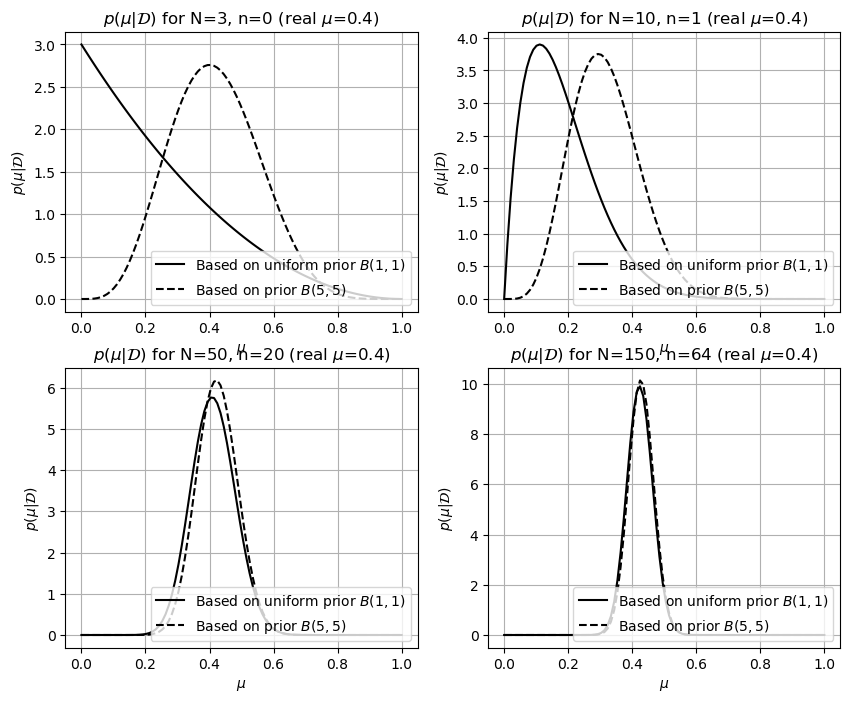

In [2]:
using PyPlot, Distributions
f = figure()
range_grid = range(0.0, stop=1.0, length=100)
μ = 0.4
samples = rand(192) .<= μ # Flip 192 coins
posterior1 = Array{Distribution}(undef,193)
posterior2 = Array{Distribution}(undef,193)
for N=0:1:192
    n = sum(samples[1:N]) # Count number of heads in first N flips
    posterior1[N+1] = Beta(1+n, 1+(N-n))
    posterior2[N+1] = Beta(5+n, 5+(N-n))
  
end

fig = figure("Posterior distributions", figsize=(10,8));
ax1 = fig.add_subplot(2,2,1);
ax2 = fig.add_subplot(2,2,2);
ax3 = fig.add_subplot(2,2,3);
ax4 = fig.add_subplot(2,2,4);
plt.subplot(ax1); plot(range_grid,pdf.(posterior1[3],range_grid), "k-");
plt.subplot(ax1); plot(range_grid,pdf.(posterior2[3],range_grid), "k--");
xlabel(L"\mu"); ylabel(L"p(\mu|\mathcal{D})"); grid()
title(L"p(\mu|\mathcal{D})"*" for N=$(3), n=$(sum(samples[1:3])) (real \$\\mu\$=$(μ))")
legend(["Based on uniform prior "*L"B(1,1)","Based on prior "*L"B(5,5)"], loc=4)

plt.subplot(ax2); plot(range_grid,pdf.(posterior1[10],range_grid), "k-");
plt.subplot(ax2); plot(range_grid,pdf.(posterior2[10],range_grid), "k--");
xlabel(L"\mu"); ylabel(L"p(\mu|\mathcal{D})"); grid()
title(L"p(\mu|\mathcal{D})"*" for N=$(10), n=$(sum(samples[1:10])) (real \$\\mu\$=$(μ))")
legend(["Based on uniform prior "*L"B(1,1)","Based on prior "*L"B(5,5)"], loc=4)

plt.subplot(ax3); plot(range_grid,pdf.(posterior1[50],range_grid), "k-");
plt.subplot(ax3); plot(range_grid,pdf.(posterior2[50],range_grid), "k--");
xlabel(L"\mu"); ylabel(L"p(\mu|\mathcal{D})"); grid()
title(L"p(\mu|\mathcal{D})"*" for N=$(50), n=$(sum(samples[1:50])) (real \$\\mu\$=$(μ))")
legend(["Based on uniform prior "*L"B(1,1)","Based on prior "*L"B(5,5)"], loc=4)


plt.subplot(ax4); plot(range_grid,pdf.(posterior1[150],range_grid), "k-");
plt.subplot(ax4); plot(range_grid,pdf.(posterior2[150],range_grid), "k--");
xlabel(L"\mu"); ylabel(L"p(\mu|\mathcal{D})"); grid()
title(L"p(\mu|\mathcal{D})"*" for N=$(150), n=$(sum(samples[1:150])) (real \$\\mu\$=$(μ))")
legend(["Based on uniform prior "*L"B(1,1)","Based on prior "*L"B(5,5)"], loc=4);

$\Rightarrow$ With more data, the relevance of the prior diminishes!


### From Posterior to Point-Estimate

- In the example above, Bayesian parameter estimation and prediction were tractable in closed-form. This is often not the case. We will need to approximate some of the computations. 


- Recall Bayesian prediction

$$
p(x|D) = \int p(x|\theta)p(\theta|D)\,\mathrm{d}{\theta}
$$

- If we approximate posterior $p(\theta|D)$ by a delta function for one 'best' value $\hat\theta$, then the predictive distribution collapses to

$$
p(x|D)= \int p(x|\theta)\,\delta(\theta-\hat\theta)\,\mathrm{d}{\theta} = p(x|\hat\theta)
$$

- This is just the data generating distribution $p(x|\theta)$ evaluated at $\theta=\hat\theta$, which is easy to evaluate.


- The next question is how to get the parameter estimate $\hat{\theta}$? (See next slide).

### Some Well-known Point-Estimates

- **Bayes estimate** (the mean of the posterior)

$$
\hat \theta_{bayes}  = \int \theta \, p\left( \theta |D \right)
\,\mathrm{d}{\theta}
$$
 

- **Maximum A Posteriori** (MAP) estimate 
$$
\hat \theta_{\text{map}}=  \arg\max _{\theta} p\left( \theta |D \right) =
\arg \max_{\theta}  p\left(D |\theta \right) \, p\left(\theta \right)
$$

- **Maximum Likelihood** (ML) estimate
$$
\hat \theta_{ml}  = \arg \max_{\theta}  p\left(D |\theta\right)
$$
  - Note that Maximum Likelihood is MAP with uniform prior
  - ML is the most common approximation to the full Bayesian posterior.

### Bayesian vs Maximum Likelihood Learning

Consider the task: predict a datum $x$ from an observed data set $D$.

<table>
<tr><td></td><td style="text-align:center"> <b>Bayesian</b></td><td style="text-align:center"> <b>Maximum Likelihood </b></td></tr>
<tr><td>1. <b>Model Specification</b></td><td>Choose a model $m$ with data generating distribution $p(x|\theta,m)$ and parameter prior $p(\theta|m)$</td><td>Choose a model $m$ with same data generating distribution $p(x|\theta,m)$. No need for priors.</td></tr>
<tr><td>2. <b>Learning</b></td><td>use Bayes rule to find the parameter posterior,
$$
p(\theta|D) = \propto p(D|\theta) p(\theta)
$$  </td><td>By Maximum Likelihood (ML) optimization,
$$ 
    \hat \theta  = \arg \max_{\theta}  p(D |\theta)
$$</td></tr>
<tr><td>3. <b>Prediction</b></td><td>$$
p(x|D) = \int p(x|\theta) p(\theta|D) \,\mathrm{d}\theta
$$</td><td>
$$ 
    p(x|D) =  p(x|\hat\theta)
$$</td></tr>
</table>

### Report Card on Maximum Likelihood Estimation

- Maximum Likelihood (ML) is MAP with uniform prior. MAP is sometimes called a 'penalized' ML procedure:

$$
\hat \theta_{map}  = \arg \max _\theta  \{ \underbrace{\log
p\left( D|\theta  \right)}_{\text{log-likelihood}} + \underbrace{\log
p\left( \theta \right)}_{\text{penalty}} \}
$$

- (good!). ML works rather well if we have a lot of data because the influence of the prior diminishes with more data.

- (good!). Computationally often do-able. Useful fact that makes the optimization easier (since $\log$ is monotonously increasing):

$$\arg\max_\theta \log p(D|\theta) =  \arg\max_\theta p(D|\theta)$$

- (bad). Cannot be used for model comparison! When doing ML estimation, the Bayesian model evidence evalutes to zero because the prior probability mass under the likelihood function goes to zero. Therefore, Bayesian model evidence cannot be used to evaluate model performance: 

$$\begin{align*}
\underbrace{p(D|m)}_{\substack{\text{Bayesian}\\ \text{evidence}}} &= \int p(D|\theta) \cdot p(\theta|m)\,\mathrm{d}\theta \\
  &= \lim_{(b-a)\rightarrow \infty} \int p(D|\theta)\cdot \text{Uniform}(\theta|a,b)\,\mathrm{d}\theta \\
  &= \lim_{(b-a)\rightarrow \infty} \frac{1}{b-a}\underbrace{\int_a^b p(D|\theta)\,\mathrm{d}\theta}_{<\infty}  \\
    &= 0
\end{align*}$$

$\Rightarrow$ **ML estimation is an approximation to Bayesian learning**, but for good reason a very popular learning method when faced with lots of available data.

In [3]:
open("../../styles/aipstyle.html") do f display("text/html", read(f, String)) end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->